## Importing Libraries

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df=pd.read_csv('/content/exchange_rate.csv',index_col='date', parse_dates=True)
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [ ]:
df.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [ ]:
df.shape

(7588, 1)

In [ ]:
df.isnull().sum()

,0
Ex_rate,0


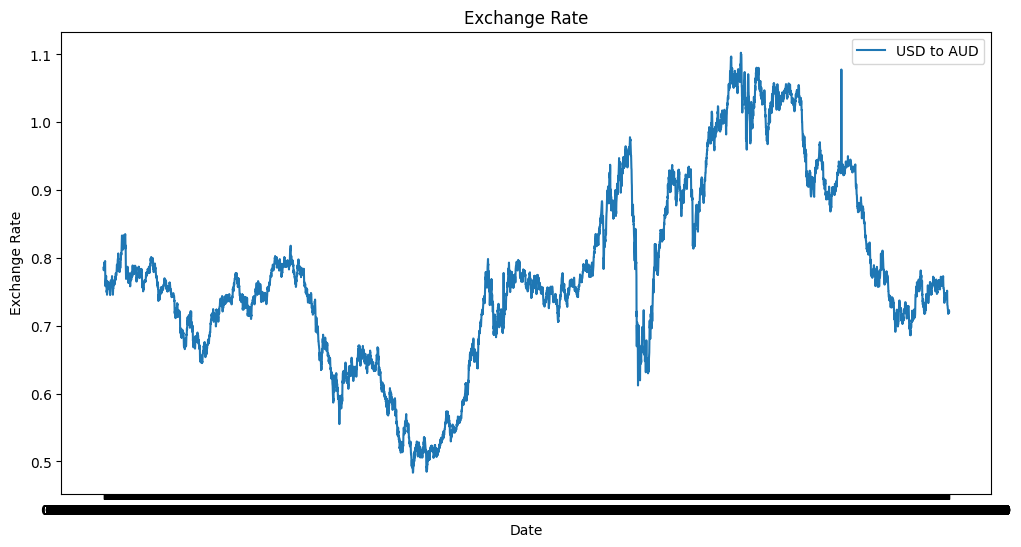

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Test for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(df):
    if adfuller(df)[1] > 0.05:
        print('Data is not Stationary')
    else:
        print('Data is stationary')

In [ ]:
adf_test(df)

Data is not Stationary


### Perform first order differencing

In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
diff_1 = diff(df, k_diff=1)

In [ ]:
adf_test(diff_1)

Data is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<ipython-input-15-f195f305d207>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


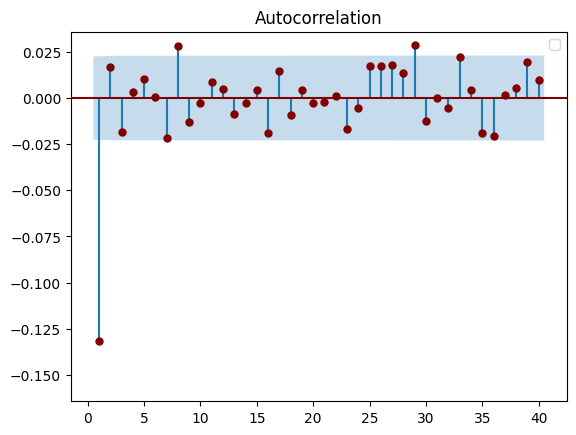

In [ ]:
plot_acf(diff_1, lags=40, zero=False,
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

<ipython-input-16-aa595af78548>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


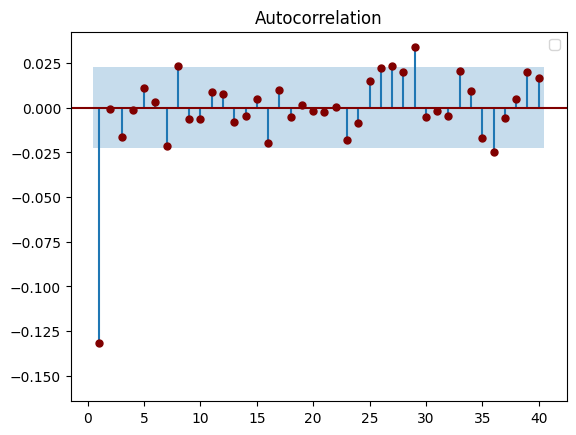

In [ ]:
plot_pacf(diff_1, lags=40, zero=False,
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

### Find the right order

In [ ]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

In [ ]:
#Train/Test split
train = df.iloc[:6570]
test= df.iloc[6570:]

In [ ]:
train.shape, test.shape

((6570, 1), (1018, 1))

In [ ]:
#Running the auto_arima
auto_model = auto_arima(y=train, c=0, start_q=0, max_p=5,
                           max_q=5,  trace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-49310.731, Time=2.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-49289.678, Time=2.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-49309.407, Time=1.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-49308.470, Time=2.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-49291.610, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-49313.963, Time=11.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-49312.049, Time=13.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-49311.919, Time=4.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-49283.677, Time=4.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-49310.060, Time=3.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-49315.887, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-49312.659, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-49313.974, Time=3.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-49313.843, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-49285.613, Time=1.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-49311.985, Time=1.90 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 58.791 seconds


In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6570
Model:               SARIMAX(3, 1, 0)   Log Likelihood               24661.943
Date:                Fri, 14 Feb 2025   AIC                         -49315.887
Time:                        11:13:24   BIC                         -49288.727
Sample:                             0   HQIC                        -49306.498
                               - 6570                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0554      0.005    -11.168      0.000      -0.065      -0.046
ar.L2          0.0209      0.007      3.217      0.001       0.008       0.034
ar.L3         -0.0282      0.007     -4.289      0.000      -0.041      -0.015
sigma2       3.21e-05   1.87e-07    171.558      0.000    3.17e-05    3.25e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            105107.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.47   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_model.order

(3, 1, 0)

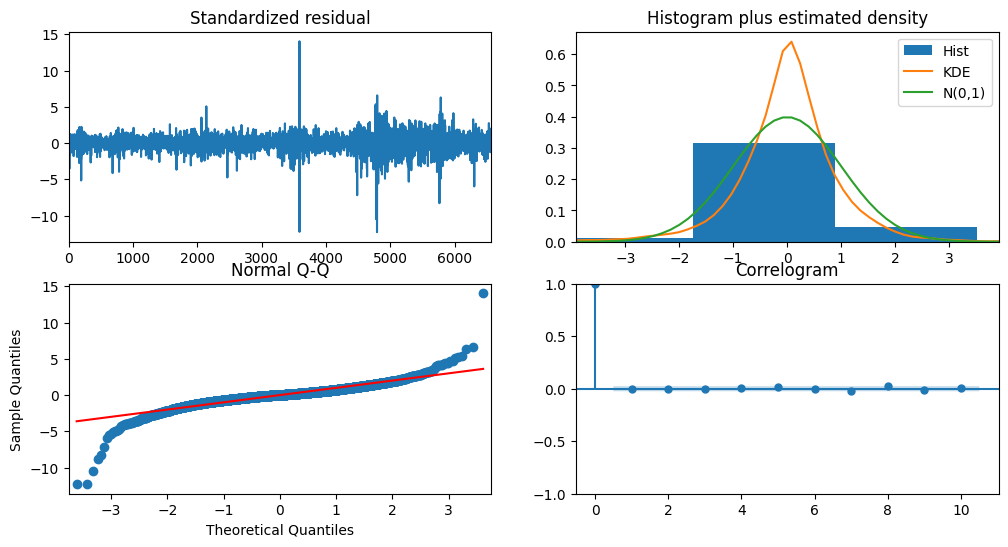

In [ ]:
auto_model.plot_diagnostics(figsize=(12,6));

### Build the best model

In [ ]:
# Creating Final ARIMA model
from statsmodels.tsa.arima.model import ARIMA
final_model = ARIMA(train,
                    order=auto_model.order)
final_output = final_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
start = len(train)
end = len(df)-1
start,end

(6570, 7587)

In [ ]:
# Getting the forecast for 36 months
forecast = final_output.predict(start = start, end=end)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast

,predicted_mean
6570,0.904301
6571,0.904540
6572,0.904327
6573,0.904355
6574,0.904342
...,...
7583,0.904349
7584,0.904349
7585,0.904349
7586,0.904349


## Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [ ]:
model_ses12=SimpleExpSmoothing(df['Ex_rate'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,0
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.785500
03-01-1990 00:00,0.784945
04-01-1990 00:00,0.785208
05-01-1990 00:00,0.785327


In [ ]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Ex_rate,SES12
date,,
01-01-1990 00:00,0.7855,0.785500
02-01-1990 00:00,0.7818,0.784945
03-01-1990 00:00,0.7867,0.785208
04-01-1990 00:00,0.7860,0.785327
05-01-1990 00:00,0.7849,0.785263


## Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(df['Ex_rate'], trend='add')
fitted_model= mod_add12.fit()
df['DESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Ex_rate,SES12,DESadd12
date,,,
01-01-1990 00:00,0.7855,0.785500,0.785438
02-01-1990 00:00,0.7818,0.784945,0.782264
03-01-1990 00:00,0.7867,0.785208,0.786115
04-01-1990 00:00,0.7860,0.785327,0.786006
05-01-1990 00:00,0.7849,0.785263,0.785035


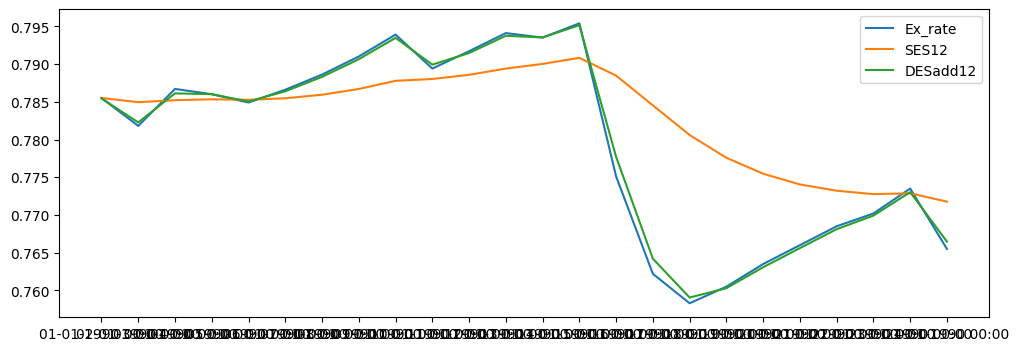

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df[['Ex_rate','SES12','DESadd12']].iloc[:24], label=['Ex_rate','SES12','DESadd12']);
plt.legend()
plt.show()

In [ ]:
df['DESmul12'] = ExponentialSmoothing(df['Ex_rate'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Ex_rate,SES12,DESadd12,DESmul12
date,,,,
01-01-1990 00:00,0.7855,0.785500,0.785438,0.785422
02-01-1990 00:00,0.7818,0.784945,0.782264,0.782246
03-01-1990 00:00,0.7867,0.785208,0.786115,0.786095
04-01-1990 00:00,0.7860,0.785327,0.786006,0.785987
05-01-1990 00:00,0.7849,0.785263,0.785035,0.785016


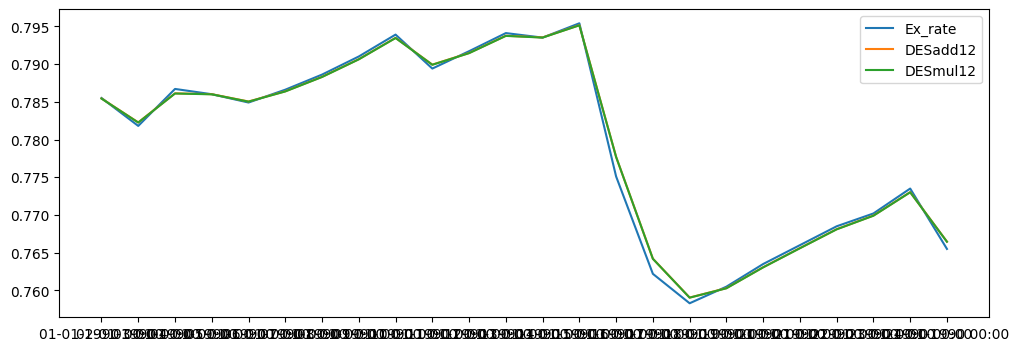

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df[['Ex_rate','DESadd12','DESmul12']].iloc[:24], label=['Ex_rate','DESadd12','DESmul12']);
plt.legend()
plt.show()

## Triple Exponential Smoothing

In [ ]:
df['TESadd12'] = ExponentialSmoothing(df['Ex_rate'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Ex_rate,SES12,DESadd12,DESmul12,TESadd12
date,,,,,
01-01-1990 00:00,0.7855,0.785500,0.785438,0.785422,0.785251
02-01-1990 00:00,0.7818,0.784945,0.782264,0.782246,0.785509
03-01-1990 00:00,0.7867,0.785208,0.786115,0.786095,0.782242
04-01-1990 00:00,0.7860,0.785327,0.786006,0.785987,0.786370
05-01-1990 00:00,0.7849,0.785263,0.785035,0.785016,0.785967


In [ ]:
df['TESmul12'] = ExponentialSmoothing(df['Ex_rate'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Ex_rate,SES12,DESadd12,DESmul12,TESadd12,TESmul12
date,,,,,,
01-01-1990 00:00,0.7855,0.785500,0.785438,0.785422,0.785251,0.784967
02-01-1990 00:00,0.7818,0.784945,0.782264,0.782246,0.785509,0.785443
03-01-1990 00:00,0.7867,0.785208,0.786115,0.786095,0.782242,0.782211
04-01-1990 00:00,0.7860,0.785327,0.786006,0.785987,0.786370,0.786373
05-01-1990 00:00,0.7849,0.785263,0.785035,0.785016,0.785967,0.786045


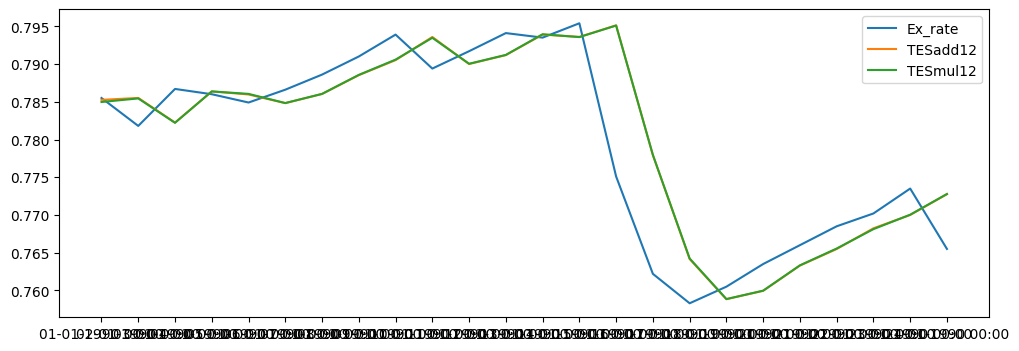

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df[['Ex_rate','TESadd12','TESmul12']].iloc[:24], label = ['Ex_rate','TESadd12','TESmul12'])
plt.legend()
plt.show()